<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Pattern Recognition
The purpose of this project is analyze the asl_dataset from kaggle
* https://www.kaggle.com/datasets/ayuraj/asl-dataset

Using a Convolutional Neural Networks,

Here a some courses and documentattion that i took to learn more about the CNNs
* https://www.tensorflow.org/tutorials/keras/classification
* https://learning.oreilly.com/course/deep-learning-/9781801076272/
* https://ruc.udc.es/dspace/bitstream/handle/2183/28349/2021_Juan_Jose_Cabrera_Entrenamiento_optimizacion_y_validacion_de_una_CNN.pdf
* https://stackoverflow.com/questions/59394947/how-to-fix-resourceexhaustederror-oom-when-allocating-tensor
* https://github.com/QuiqueCov/Maestria/blob/main/CIFAR_IMPROVED.ipynb






In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [66]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [67]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
#Cambiar directorio default de python
import os
os.chdir("/content/gdrive/MyDrive/asl_dataset")

In [69]:
!ls

0  2  4  6  8  a  c  e	g  i  k  m  o  q  s  u	w  y
1  3  5  7  9  b  d  f	h  j  l  n  p  r  t  v	x  z


As you can see in the previous code of block, there are folders with each character of asl:
* from 0 to 9
* from a -z


Lets explore our dataset

In [70]:
os.chdir('/content/gdrive/MyDrive/asl_dataset/0')

In [71]:
!pwd

/content/gdrive/MyDrive/asl_dataset/0


In [72]:
!ls

hand1_0_bot_seg_1_cropped.jpeg	  hand2_0_left_seg_1_cropped.jpeg
hand1_0_bot_seg_2_cropped.jpeg	  hand2_0_left_seg_2_cropped.jpeg
hand1_0_bot_seg_3_cropped.jpeg	  hand2_0_left_seg_3_cropped.jpeg
hand1_0_bot_seg_4_cropped.jpeg	  hand2_0_left_seg_4_cropped.jpeg
hand1_0_bot_seg_5_cropped.jpeg	  hand2_0_left_seg_5_cropped.jpeg
hand1_0_dif_seg_1_cropped.jpeg	  hand2_0_right_seg_1_cropped.jpeg
hand1_0_dif_seg_2_cropped.jpeg	  hand2_0_right_seg_2_cropped.jpeg
hand1_0_dif_seg_3_cropped.jpeg	  hand2_0_right_seg_3_cropped.jpeg
hand1_0_dif_seg_4_cropped.jpeg	  hand2_0_right_seg_4_cropped.jpeg
hand1_0_dif_seg_5_cropped.jpeg	  hand2_0_right_seg_5_cropped.jpeg
hand1_0_left_seg_1_cropped.jpeg   hand2_0_top_seg_1_cropped.jpeg
hand1_0_left_seg_2_cropped.jpeg   hand2_0_top_seg_2_cropped.jpeg
hand1_0_left_seg_3_cropped.jpeg   hand2_0_top_seg_3_cropped.jpeg
hand1_0_left_seg_4_cropped.jpeg   hand2_0_top_seg_4_cropped.jpeg
hand1_0_left_seg_5_cropped.jpeg   hand2_0_top_seg_5_cropped.jpeg
hand1_0_right_seg_1_

In [73]:
image = "hand1_0_bot_seg_1_cropped.jpeg"
image_dir = "/content/gdrive/MyDrive/asl_dataset/0"

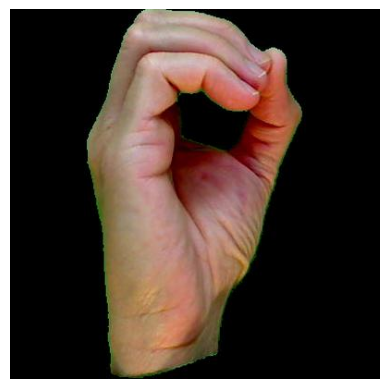

In [74]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img_path = os.path.join(image_dir, image)
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # No mostrar los ejes
plt.show()

In [75]:
folder_path = '/content/gdrive/MyDrive/asl_dataset/0' # Cambia esto al directorio correcto

files = os.listdir(folder_path)


files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))] #All files

all_files = files

print(all_files)

['hand1_0_dif_seg_4_cropped.jpeg', 'hand1_0_right_seg_2_cropped.jpeg', 'hand1_0_dif_seg_5_cropped.jpeg', 'hand1_0_left_seg_4_cropped.jpeg', 'hand1_0_left_seg_3_cropped.jpeg', 'hand1_0_right_seg_3_cropped.jpeg', 'hand1_0_right_seg_4_cropped.jpeg', 'hand1_0_bot_seg_3_cropped.jpeg', 'hand1_0_dif_seg_1_cropped.jpeg', 'hand1_0_bot_seg_2_cropped.jpeg', 'hand1_0_bot_seg_5_cropped.jpeg', 'hand1_0_right_seg_1_cropped.jpeg', 'hand1_0_bot_seg_1_cropped.jpeg', 'hand1_0_bot_seg_4_cropped.jpeg', 'hand1_0_top_seg_1_cropped.jpeg', 'hand1_0_left_seg_1_cropped.jpeg', 'hand1_0_dif_seg_3_cropped.jpeg', 'hand1_0_dif_seg_2_cropped.jpeg', 'hand1_0_left_seg_5_cropped.jpeg', 'hand1_0_right_seg_5_cropped.jpeg', 'hand1_0_left_seg_2_cropped.jpeg', 'hand1_0_top_seg_2_cropped.jpeg', 'hand2_0_top_seg_1_cropped.jpeg', 'hand2_0_right_seg_5_cropped.jpeg', 'hand1_0_top_seg_3_cropped.jpeg', 'hand2_0_right_seg_2_cropped.jpeg', 'hand2_0_bot_seg_4_cropped.jpeg', 'hand2_0_left_seg_4_cropped.jpeg', 'hand2_0_top_seg_2_cropped.

## Loading all the data


In [76]:
data_path = ('/content/gdrive/MyDrive/asl_dataset')

In [77]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    labels='inferred',  # Las etiquetas se infieren de los nombres de las carpetas
    label_mode='int',   # Las etiquetas se cargarán como enteros inicialmente
    image_size=(128, 128), # implicit scaling
    batch_size= 8 # normalizing the bach_size
)

Found 2515 files belonging to 36 classes.


In [78]:
K = len(data.class_names)
data_names = data.class_names
print(K)
print(data.class_names)

36
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


# Scaling the data
Converting to a gray scale

In [79]:
# Convert to gray scale
def convert_to_grayscale(image, label):
  grayscale_image = tf.image.rgb_to_grayscale(image)
  return grayscale_image, label



In [80]:
# Using the function
data = data.map(convert_to_grayscale)

In [81]:
# Obtener los nombres de las clases
# class_names = data.class_names

# Función para convertir etiquetas numéricas a etiquetas de texto
def decode_labels(image, label):
    label = tf.gather(class_names, label)
    return image, label

# Aplicar la función a todo el conjunto de datos
#data = data.map(decode_labels)


In [82]:
data_iterator = data.as_numpy_iterator()

In [83]:
batch = data_iterator.next()

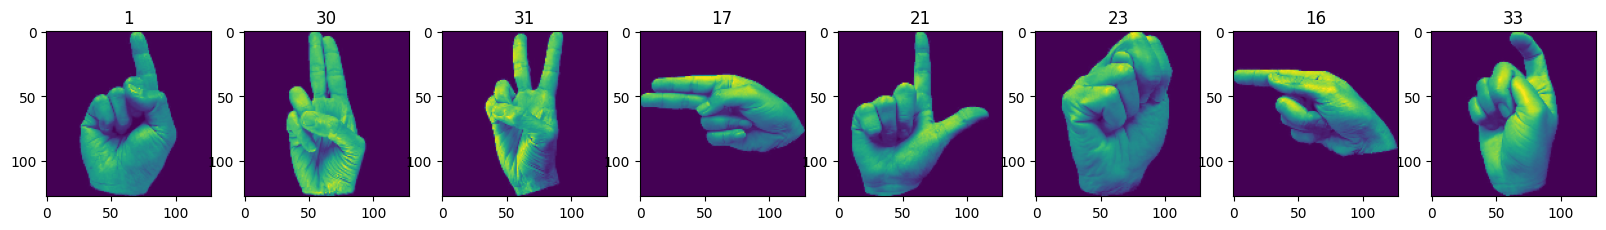

In [84]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Here is one problem of how I am loading the data.

And the is that it is codifying the labels.

In [85]:
batch[0]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [86]:
batch[1] # labels

array([ 1, 30, 31, 17, 21, 23, 16, 33], dtype=int32)

# Scale Data


This was my first aproach of how could I scale the data, however, at the end I decided to use other method.

In [87]:
#data = data.map(lambda x,y: (x/255, y))

In [88]:
#data.as_numpy_iterator().next()

In [89]:
#fig, ax = plt.subplots(ncols=10, figsize=(20,20))
#for idx, img in enumerate(batch[0][:10]):
 #   ax[idx].imshow(img.astype(float))
  #  ax[idx].title.set_text(batch[1][idx])

In [90]:
len(data)

315

# Dividing

In this block is explained how I divided the data:
* 70 % of the information to train
* 20 % of the information to validate
* 10 % of the information to test

In [91]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [92]:
# sizes
print(train_size) ## 55 *32
print(val_size) ## 15 *32
print(test_size) # 7*32

220
63
31


In [93]:
type(data)

tensorflow.python.data.ops.map_op._MapDataset

In [94]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

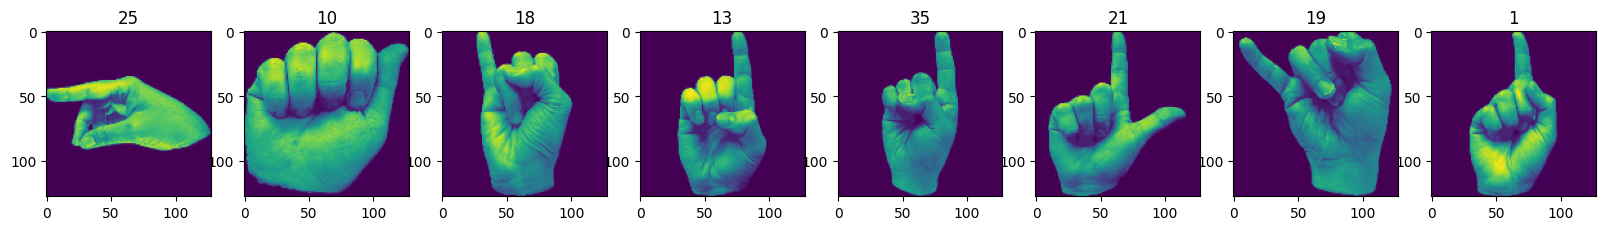

In [95]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
train_iterator = train.as_numpy_iterator()
# Get the first batch of data from the iterator
train_batch = train_iterator.next()
# Iterate through the images and labels within the batch
for idx, img in enumerate(train_batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])  # this is how i
plt.show() # Add this line to display the plot

#Model Definition


In [96]:

i =Input(shape=(128,128,1)) # 128x128, 1 = gray_scale
# First Layer
x = Conv2D(32, (2,2), activation='relu', padding='same')(i) # Padding same, in order to dont modify the image size
x = BatchNormalization()(x)
x = Conv2D(32, (2,2), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

# Second Layer
x = Conv2D(64, (2,2), activation='relu', padding='same')(x) # Padding same, in order to dont modify the image size
x = BatchNormalization()(x)
x = Conv2D(64, (2,2), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

# Third Layer
x = Conv2D(128, (2,2), activation='relu', padding='same')(x) # Padding same, in order to dont modify the image size
x = BatchNormalization()(x)
x = Conv2D(128, (2,2), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

# Fourth Layer
x = Conv2D(256, (2,2), activation='relu', padding='same')(x) # Padding same, in order to dont modify the image size
x = BatchNormalization()(x)
x = Conv2D(256, (2,2), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)


x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [97]:
model

<Functional name=functional, built=True>

In [98]:
# compile
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

'\nEpoch 31/50\n220/220 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.2926 - loss: 2.5237 - val_accuracy: 0.2956 - val_loss: 3.2754\n'

In [99]:
r = model.fit(train, validation_data = val, epochs=50)

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - accuracy: 0.3176 - loss: 6.6832 - val_accuracy: 0.6111 - val_loss: 1.2128
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.6507 - loss: 1.3042 - val_accuracy: 0.8472 - val_loss: 0.5020
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.7419 - loss: 0.7737 - val_accuracy: 0.8750 - val_loss: 0.6800
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.8071 - loss: 0.6355 - val_accuracy: 0.8948 - val_loss: 0.2913
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.8285 - loss: 0.5677 - val_accuracy: 0.8849 - val_loss: 0.3070
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.8638 - loss: 0.3992 - val_accuracy: 0.8929 - val_loss: 0.2852
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.8702 - loss: 0.3394 - val_accuracy: 0.8909 - val_loss: 0.4389
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.8555 - loss: 0.4247 - 

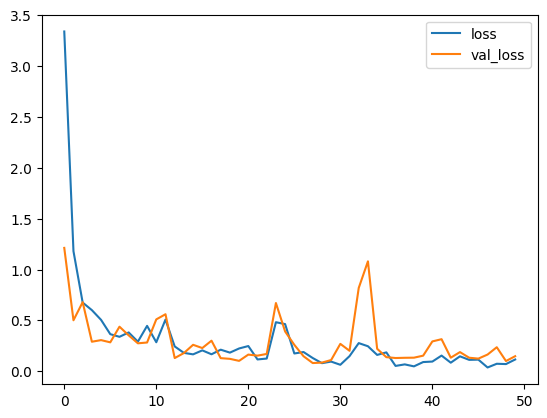

In [100]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

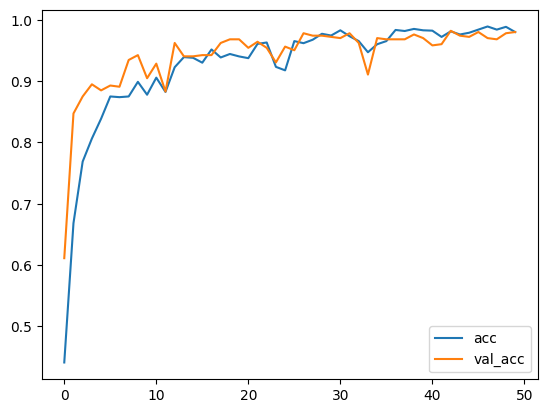

In [101]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


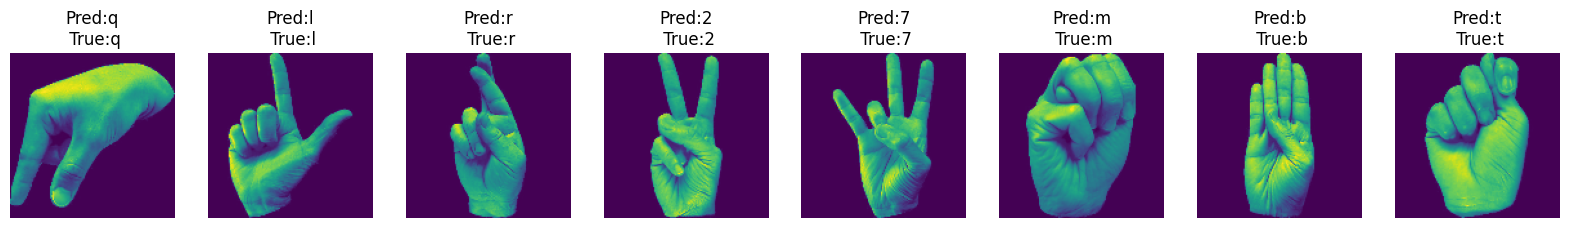

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


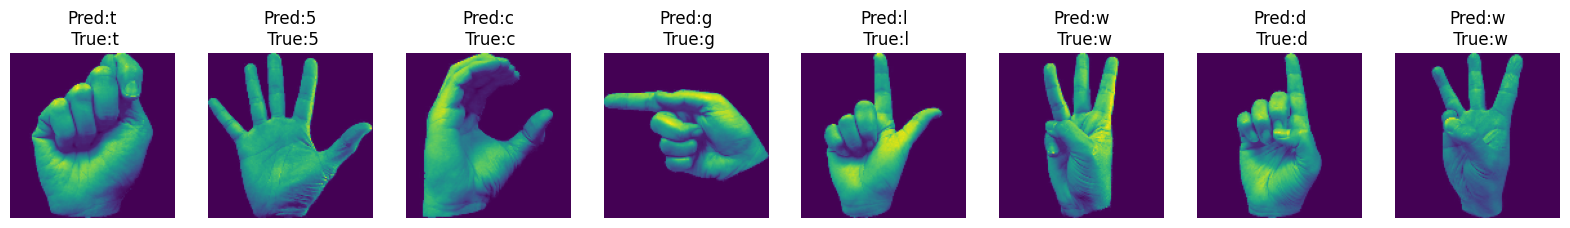

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


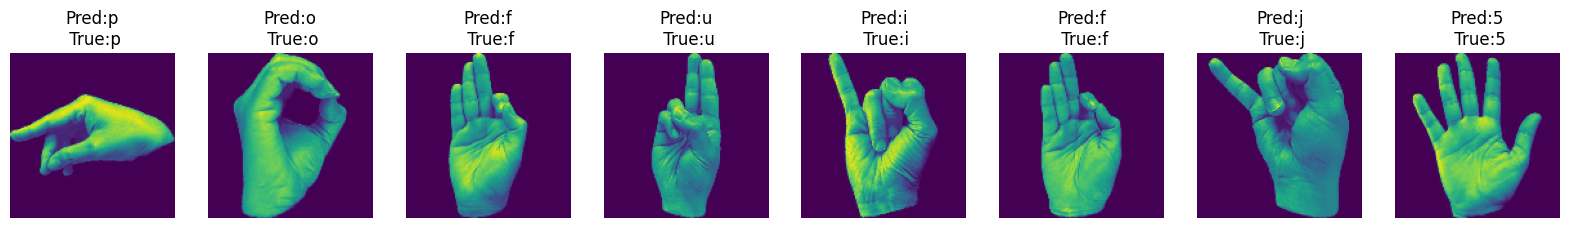

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


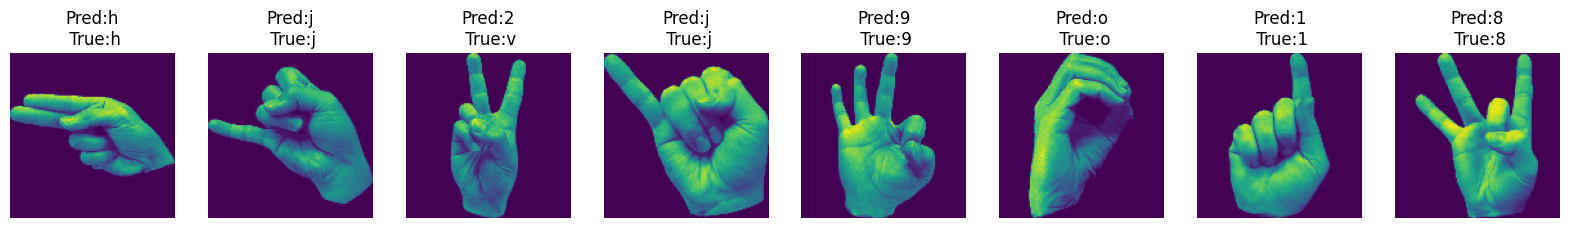

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


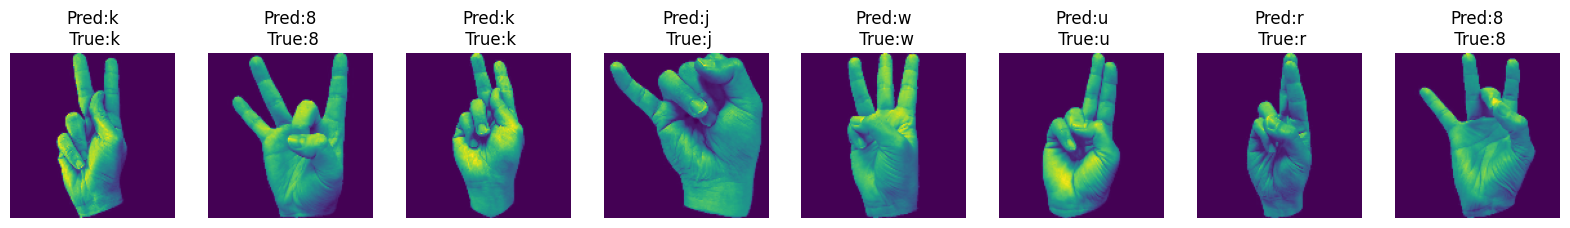

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


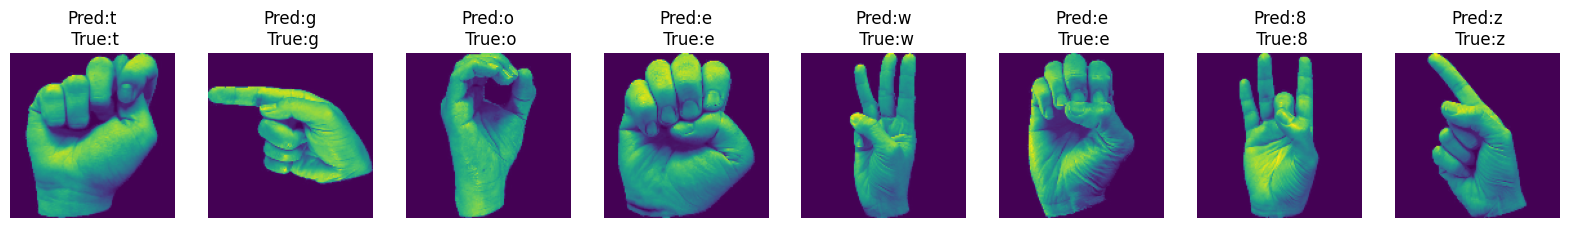

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


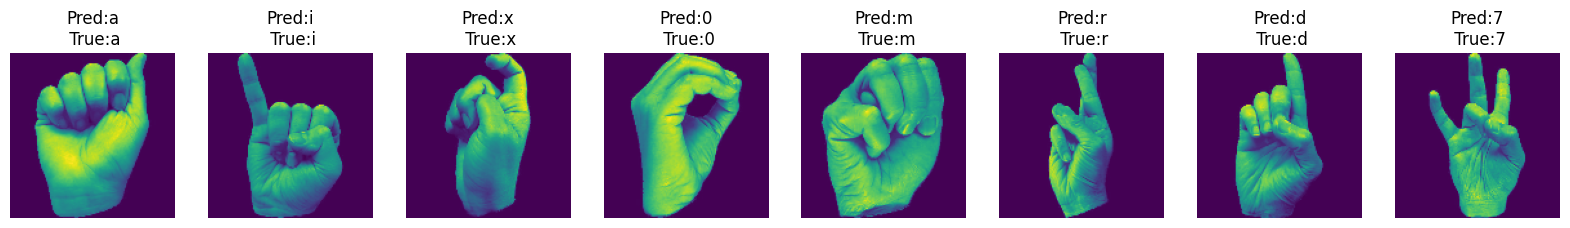

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


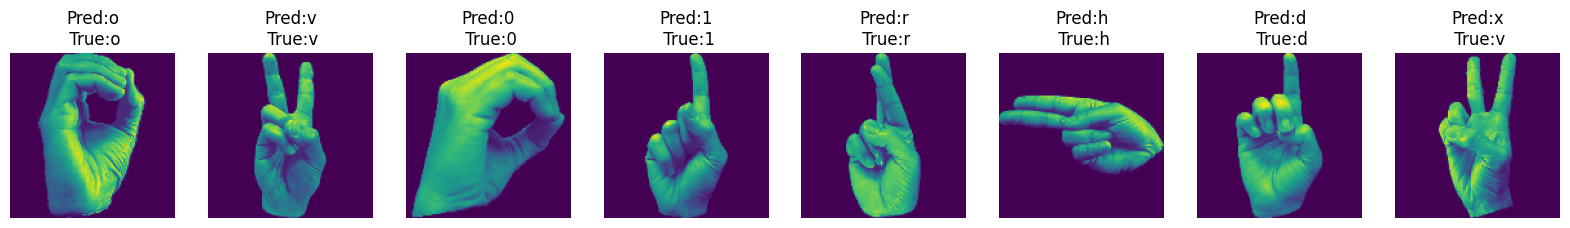

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


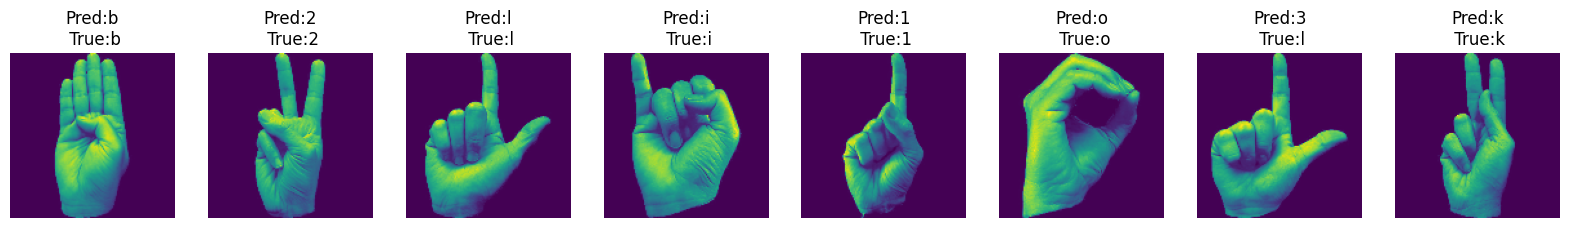

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


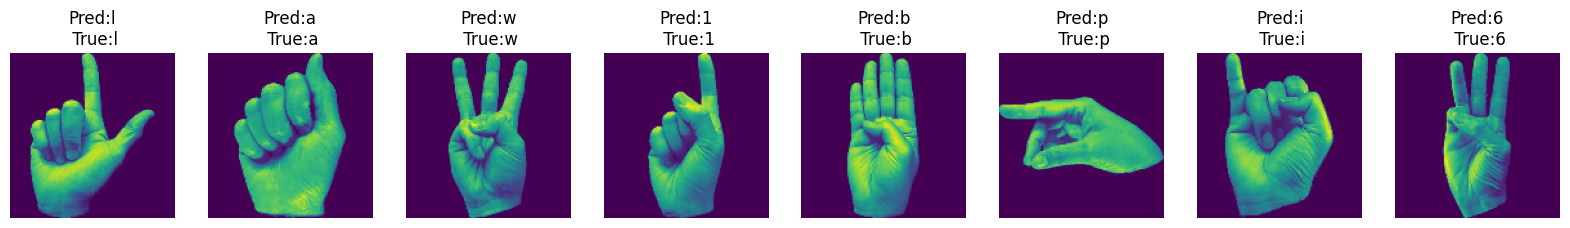

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


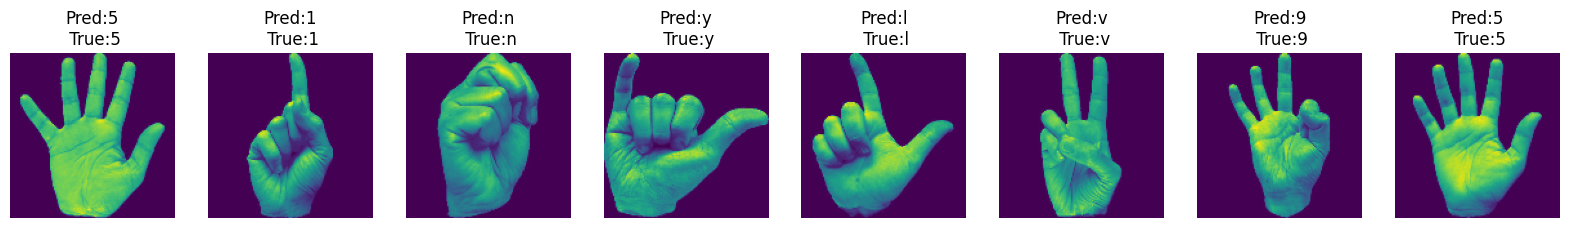

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


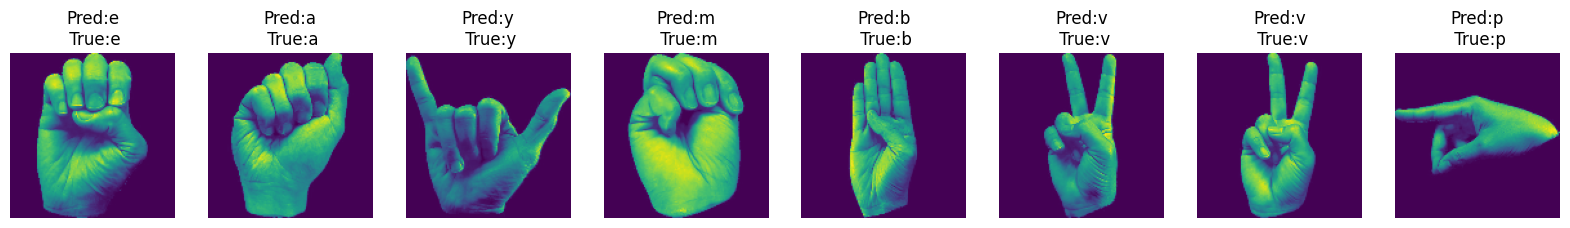

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


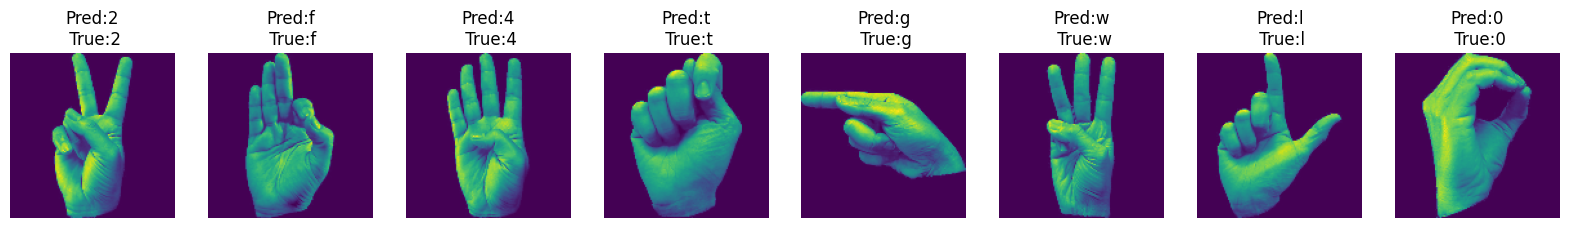

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


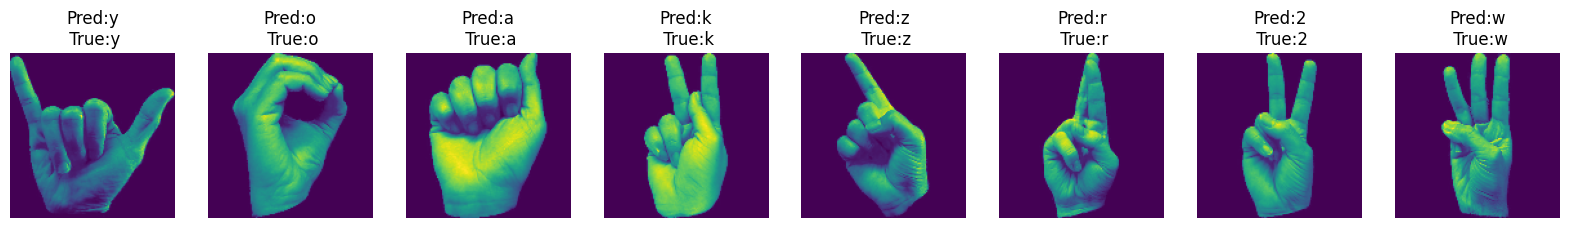

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


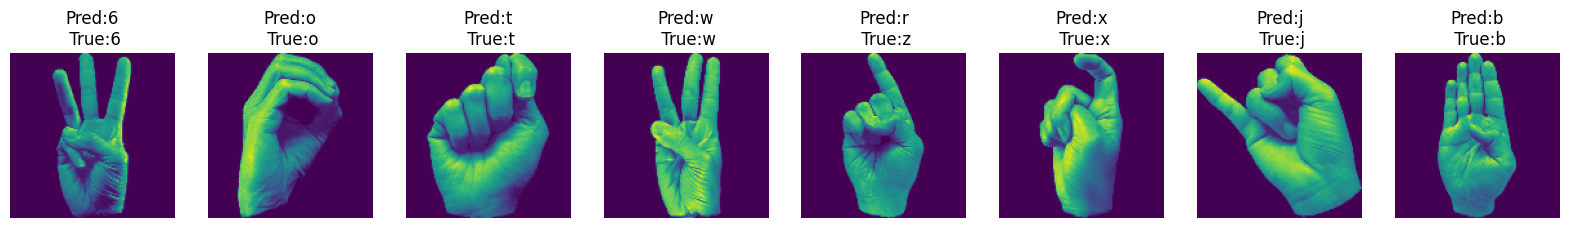

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


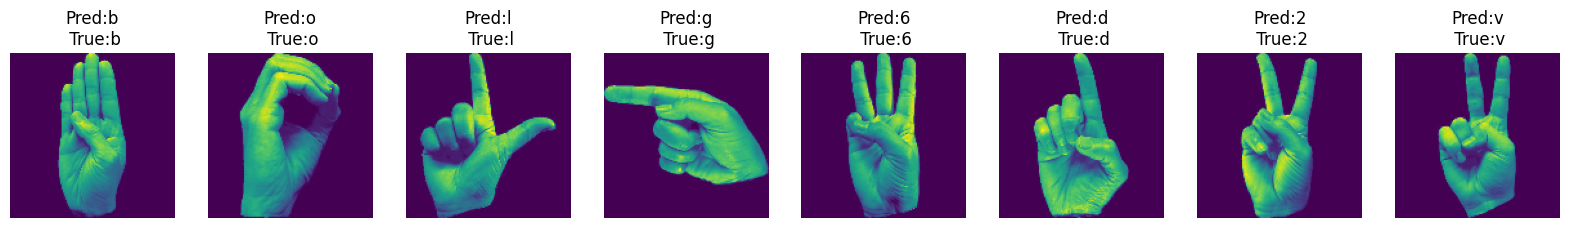

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


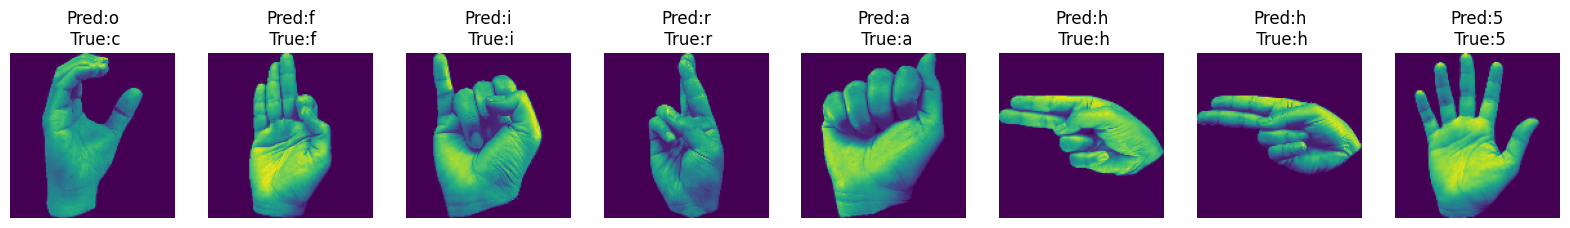

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


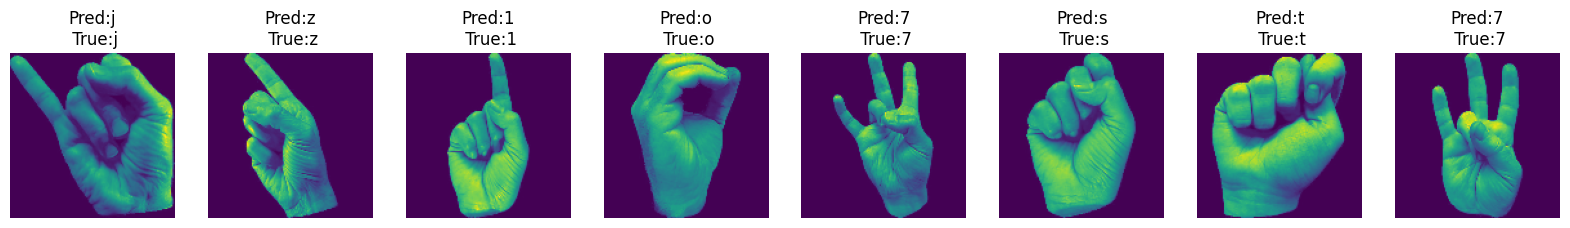

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


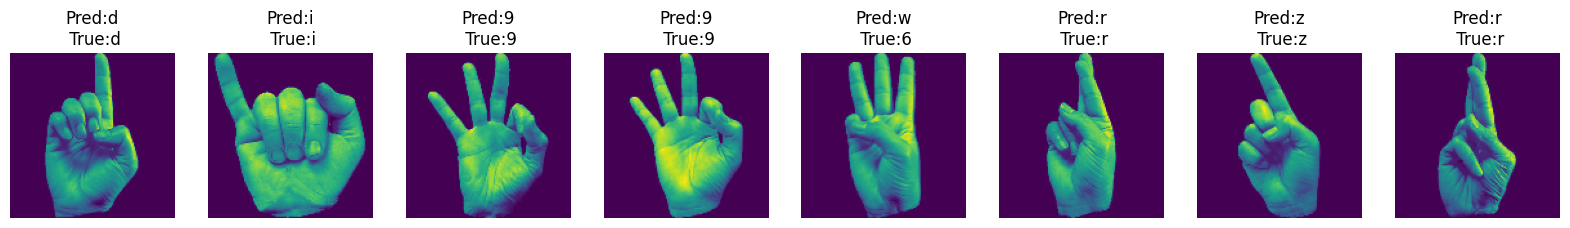

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


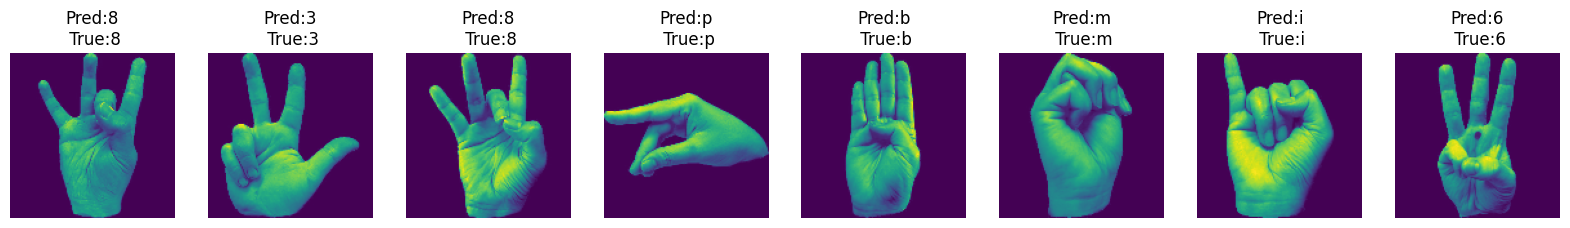

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


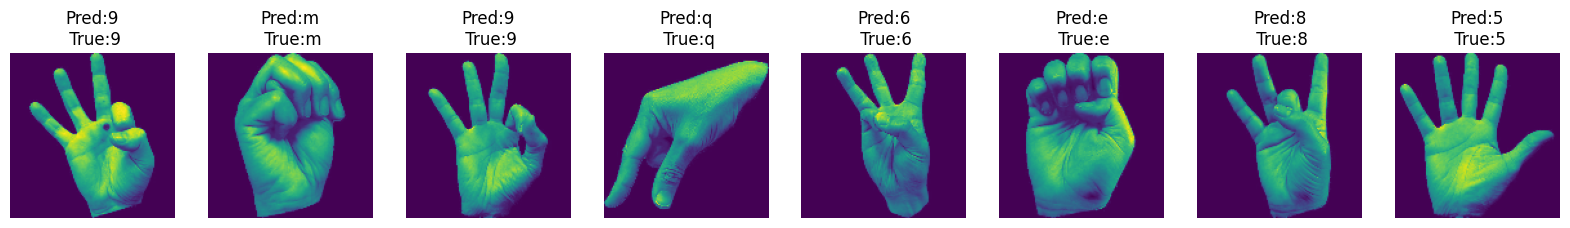

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


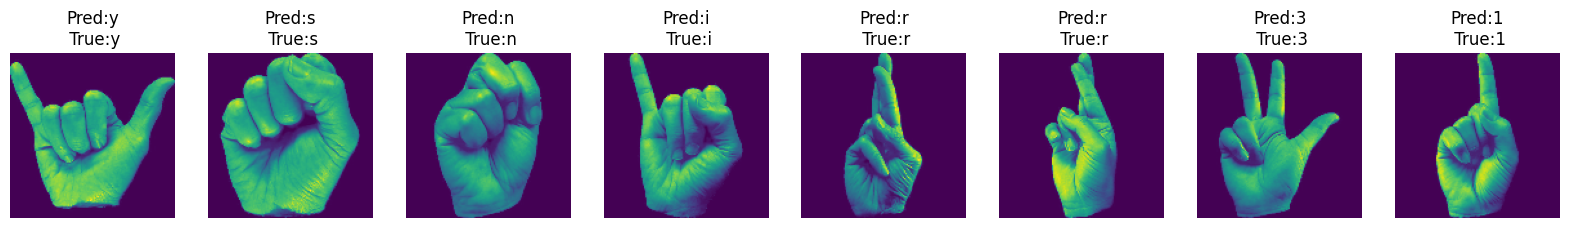

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


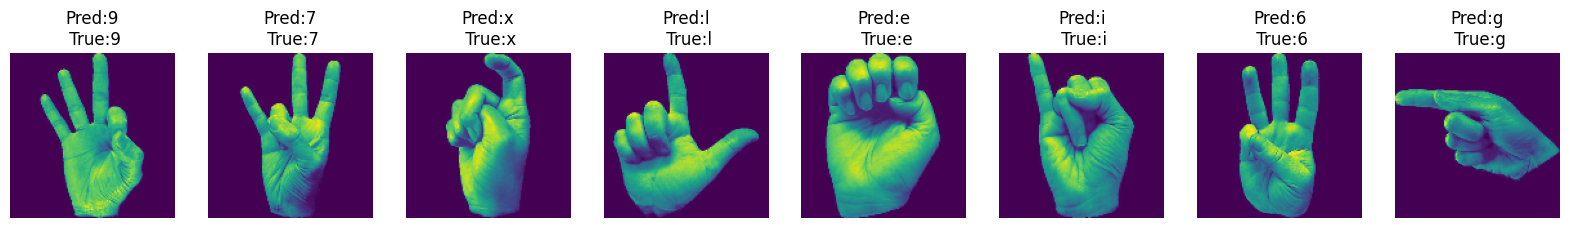

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


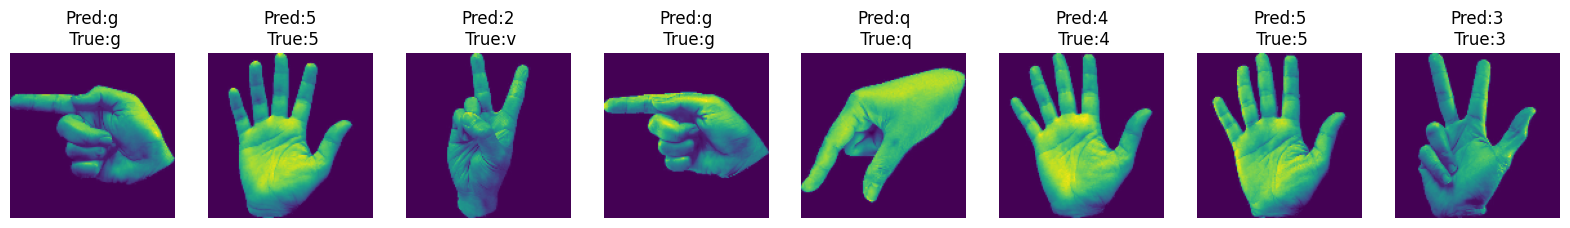

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


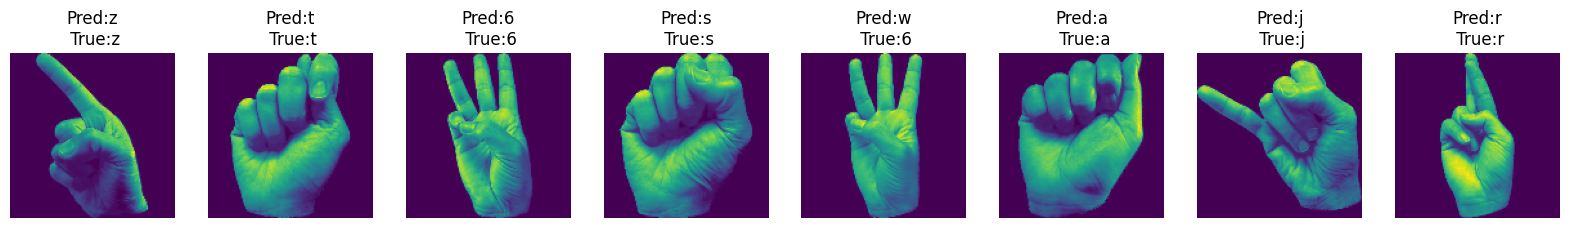

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


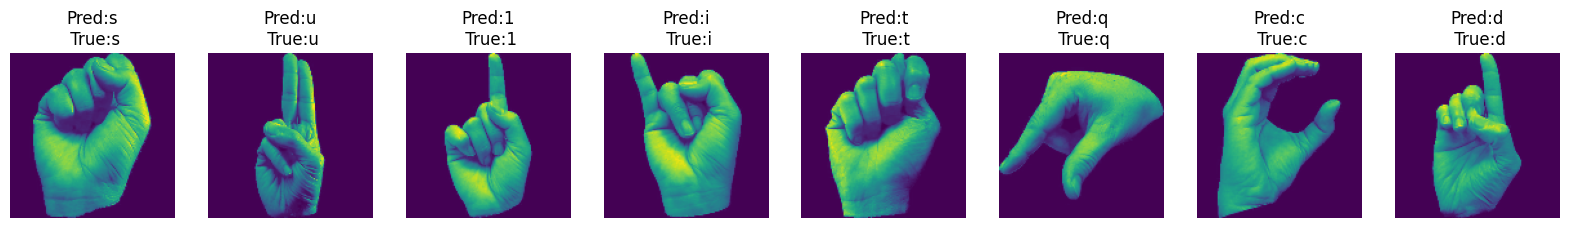

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


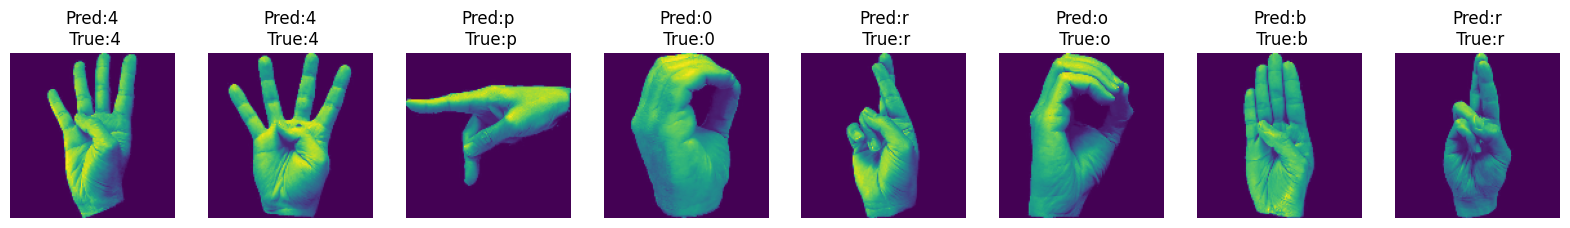

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


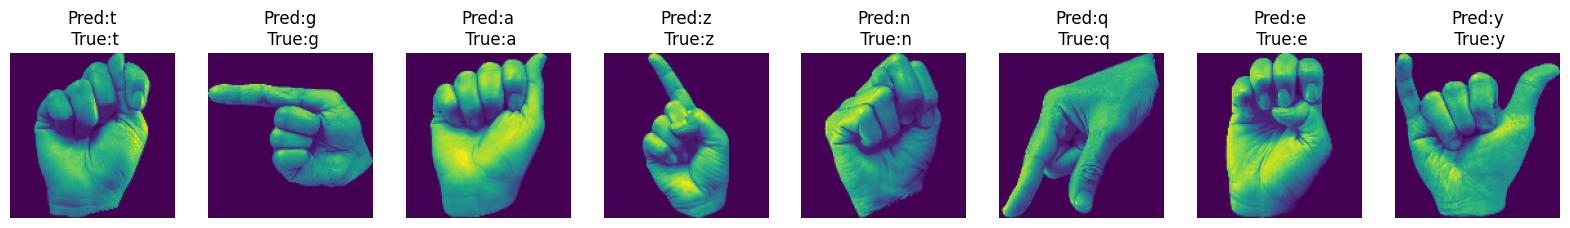

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


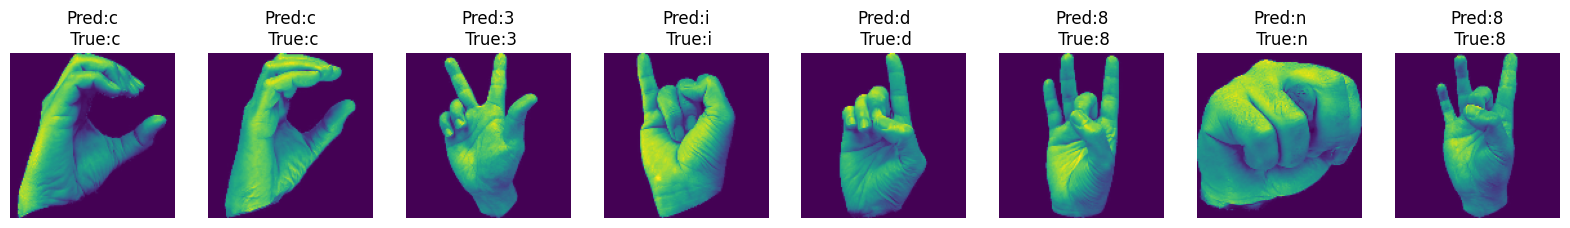

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


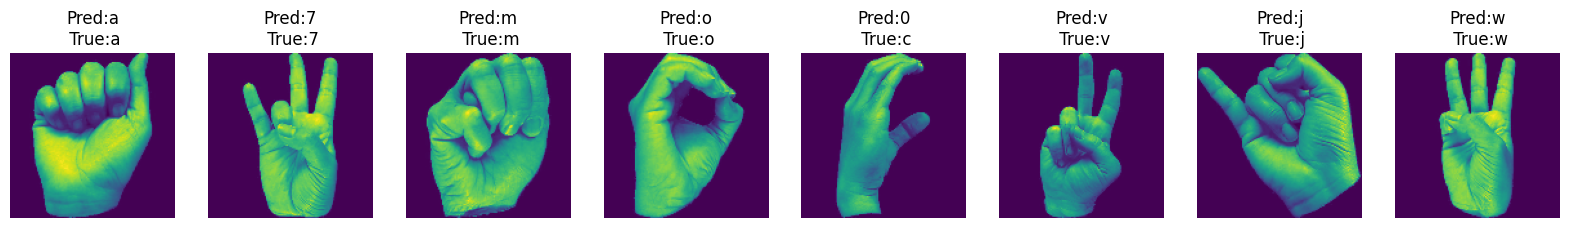

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


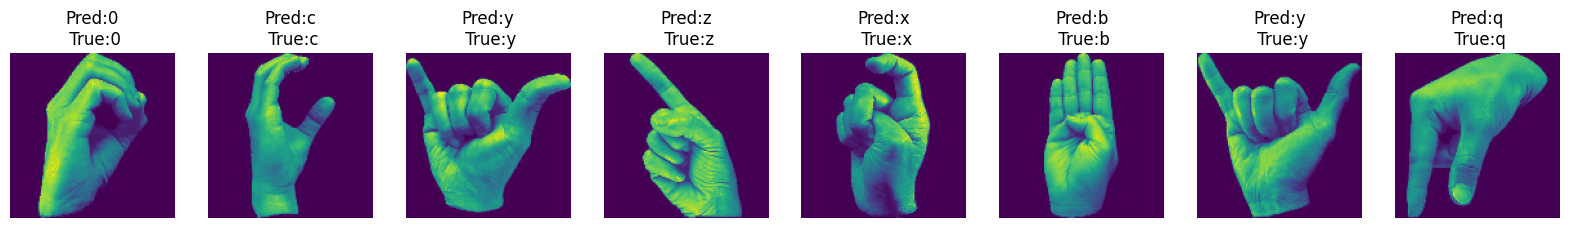

In [119]:
predictions = model.predict(test) # Predicting
predicted_labels = np.argmax(predictions, axis=1) # getting the labels

test_iterator = test.as_numpy_iterator() # using a test iterator

for batch in test_iterator: # iteraring throught the batches
    images, true_labels = batch
    batch_predictions = model.predict(images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)

    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(20, 5)) # plotting the images
    for i in range(len(images)):
      axes[i].imshow(images[i].astype(int))
      axes[i].set_title(f"Pred:{data_names[batch_predicted_labels[i]]}\n True:{data_names[true_labels[i]]}")
      axes[i].axis('off')
    plt.show()


In [ ]:
model.summary()

# Conclusion
Algunos retos que enfrente:

* Al principio decidi no hacer la parte de escalar los datos como tal, ya que basicamente todas estas imagenes como que fueron tomadas en un estudio de fotografia, todas median lo mismo y todas tienen el fondo negro, Peor esto cambio se podra apreciar mas en los siguientes comentarios.
* Otra de las cosas que note es que al principio estaba intentando usarlas con los 3 canales o en su formato original y esto ocasionaba que el tiempo de procesamiento fuera demasiado alto o que simplemente colab me diera el error de " ResourceExhaustedError".
* Todo esto me hizo cambiar ciertos parametros que enunciare a continuacion:
  * El batch size, lo tuve que hacer mas pequenio
  * Tuve que trabajar con las imagenes en escala de grises
  * Las imagenes originalmente venian de 256x256, y las reduje a 128x128
* Si prestamos anterior a lo enunciado anteriormente esta fue mi forma de escalar o de normalizar los datos

El modelo en la ultima epoca arroja los siguientes resultados:

accuracy: 0.9770 - loss: 0.1161 - val_accuracy: 0.9802 - val_loss: 0.1491

* Al principio solo estaba usando dos capas o en mi CNN, sin embargo los coeficientes que arrojaban eran demasiado bajos, asi que decidi duplicar las capas y fue cuando llegue al resultado anterior que para mi es el aceptable.

De aqui se pueden llegar a 3 concluciones:
1. - Existe un buen rendimiento debido a que el accuracy y el val_accuracy, son elevados y demeuestran que tanto en la validacion como en el entrnamiento el modelo esta generalizando bien.
2. - Las perdidas son bajas, si bien val_loss es ligero mas alto, desde mi punto de vista siguen siendo bajos.
3. - Si bien el accuracy nunca es 1 y la perdida nunca es 0 durante la materia siempre hemos visto que no siempre que los valores sean cercanos a los dos limites es bueno, tal vez tener el 1 de precision quiere decir que se esta sobreentranando o que esta sobreajustado.

Dentro de el set de predicciones anteriores yo observo que las confusiones mas grandes son en:
* w con el 6
* v con el 2



# Future Features
* Una de las cosas que aprendi que no implemente fue el data augmentation, no lo implemente porque viendo los resultados creo que no seria necesaria, ya que los coeficientes que arroja para mi son aceptables
* Me gustaria agregar una captura en streaming para que pudiera detectar las letras via webcam
